In [3]:
import os

from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
from sklearn import svm, metrics, datasets
from sklearn.utils import Bunch
from sklearn.model_selection import GridSearchCV, train_test_split

from skimage.io import imread
from skimage.transform import resize
import skimage

In [4]:
def load_image_files(container_path, dimension=(104, 104)):
    
    image_dir = Path(container_path)
    folders = [directory for directory in image_dir.iterdir() if directory.is_dir()]
    categories = [fo.name for fo in folders]
    descr = "Animal Classification using SVM"
    images = []
    flat_data = []
    target = []
    for i, direc in enumerate(folders):
        for file in direc.iterdir():
            img = skimage.io.imread(file)
            img_resized = resize(img, dimension, anti_aliasing=True, mode='reflect')
            flat_data.append(img_resized.flatten()) 
            images.append(img_resized)
            target.append(i)

    flat_data = np.array(flat_data)
    target = np.array(target)
    images = np.array(images)
    return Bunch(data=flat_data,
                 target=target,
                 target_names=categories,
                 images=images,
                 DESCR=descr)

In [7]:
image_dataset = load_image_files("C:\\Users\\PREETI\\Desktop\\animals") #Load here dataset
print(image_dataset.target_names)

['cat', 'dog']


In [8]:
X_train, X_test, y_train, y_test = train_test_split(image_dataset.data, image_dataset.target, test_size=0.3,random_state=0)
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]
svc = svm.SVC()
clf = GridSearchCV(svc, param_grid)
clf.fit(X_train, y_train)

C:\Users\PREETI\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [9]:
y_pred = clf.predict(X_test)

In [10]:
print(clf.score(X_test,y_test))

0.25


In [11]:
print("Classification report for - \n{}:\n{}\n".format(
    clf, metrics.classification_report(y_test, y_pred)))

Classification report for - 
GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      0.33      0.40         3

    accuracy  

In [12]:
from sklearn.metrics import confusion_matrix

In [13]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[0 1]
 [2 1]]


In [14]:
print(y_pred)

[1 0 1 0]


In [19]:
from PIL import Image
import os
def load_image(file):
    dimension=(104, 104)
    image = Image.open(file)
    flat_data = []
    img = skimage.io.imread(file)
    img_resized = resize(img, dimension, anti_aliasing=True, mode='reflect')
    flat_data.append(img_resized.flatten()) 
    return image,flat_data

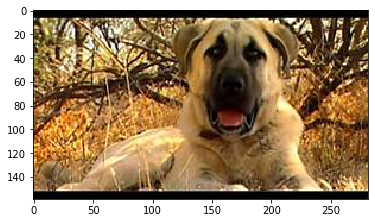

Predicted animal is dog


In [23]:
plot , img = load_image('C:\\Users\\PREETI\\Desktop\\images\\yoo.jfif')
%matplotlib inline
plt.imshow(plot)
plt.show()
k = image_dataset.target_names
p = clf.predict(img)
s = [str(i) for i in p] 
a = int("".join(s)) 
print("Predicted animal is", k[a])

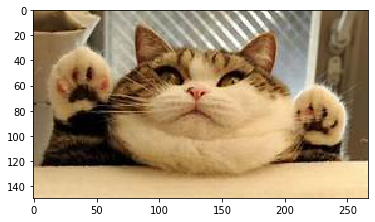

Predicted animal is cat


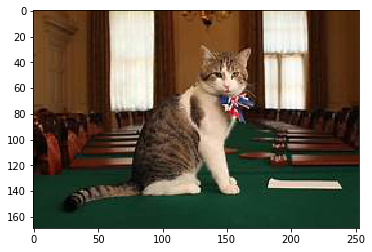

Predicted animal is dog


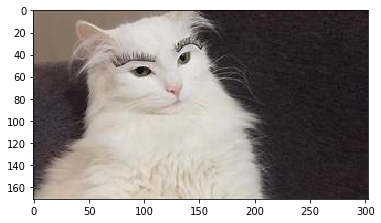

Predicted animal is cat


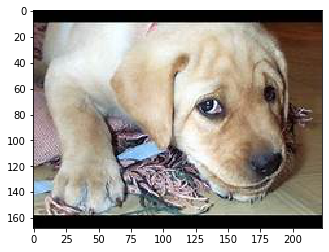

Predicted animal is cat


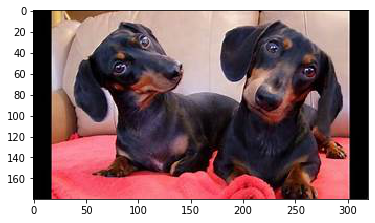

Predicted animal is dog


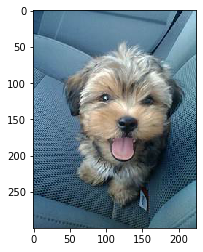

Predicted animal is cat


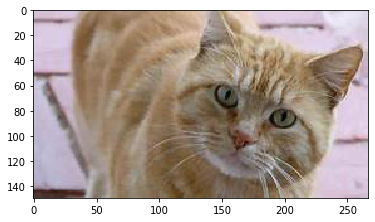

Predicted animal is cat


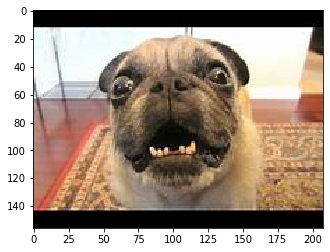

Predicted animal is cat


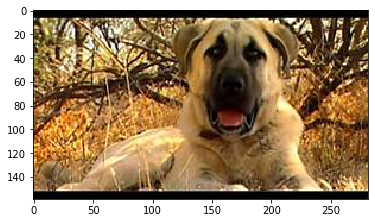

Predicted animal is dog


In [25]:

import glob

for image in glob.glob("C:\\Users\\PREETI\\Desktop\\images\\*.jfif"):

    plot , img = load_image(image)
    %matplotlib inline
    plt.imshow(plot)
    plt.show()
    k = image_dataset.target_names
    p = clf.predict(img)

    s = [str(i) for i in p] 
    a = int("".join(s)) 
    print("Predicted animal is", k[a])

In [26]:
import pickle
# now you can save it to a file
with open('animal_classifier.pkl', 'wb') as f:
    pickle.dump(clf, f)